**классификатор изображений на основе VGG16**

Евгений Борисов <esborisov@sevsu.ru>

---

VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION   
Karen Simonyan, Andrew Zisserman    
Visual Geometry Group, Department of Engineering Science, University of Oxford   

https://arxiv.org/pdf/1409.1556.pdf

---

In [1]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

## модель

In [2]:
import tensorflow as tf

tf.__version__, tf.keras.__version__

('2.8.0', '2.8.0')

## загружаем модель

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import plot_model

In [4]:
model = VGG16() # автозагрузка весов

2022-04-19 16:13:20.365953: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 16:13:20.394821: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 16:13:20.395000: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-19 16:13:20.395587: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

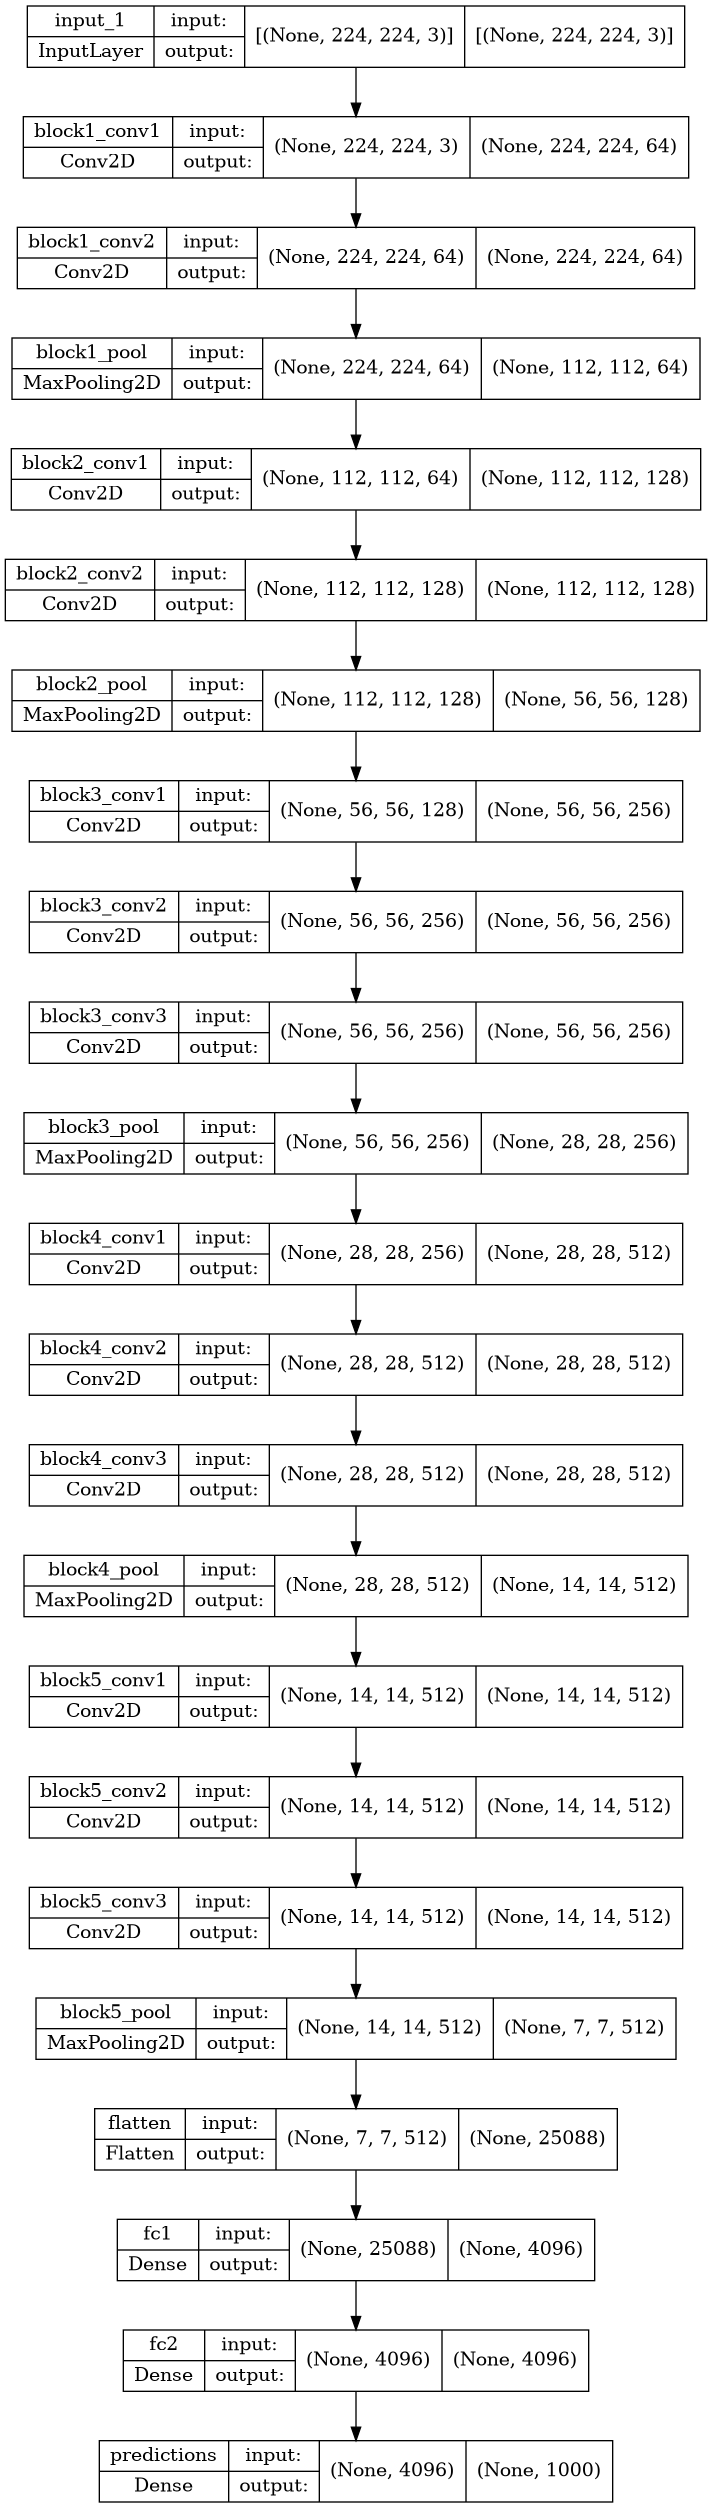

In [5]:
plot_model(model, to_file='vgg16.png', show_layer_names=True, show_shapes=True )

## тестируем

In [6]:
# имена классов imagenet1000
!wget ../data/imagenet -c https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt

--2022-04-19 16:13:22--  http://../data/imagenet
Распознаётся .. (..)… ошибка: Неизвестное имя или служба.
wget: не удаётся разрешить адрес «..»
--2022-04-19 16:13:22--  https://gist.githubusercontent.com/yrevar/942d3a0ac09ec9e5eb3a/raw/238f720ff059c1f82f368259d1ca4ffa5dd8f9f5/imagenet1000_clsidx_to_labels.txt
SSL_INIT
Загружен сертификат CA «/etc/ssl/certs/ca-certificates.crt»
Распознаётся gist.githubusercontent.com (gist.githubusercontent.com)… 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Подключение к gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 416 Range Not Satisfiable

    Файл уже полностью загружен; нечего выполнять.



In [7]:
# http://www.image-net.org

with open('../data/imagenet/imagenet1000_clsidx_to_labels.txt', 'rt') as f:   
    imagenet_labels = eval(f.read())

with open('../data/imagenet/photos/index.txt', 'rt') as f: 
    files = [ s for s in f.read().split('\n') if s ]

def image2arr(im):
    return np.array(im.resize([224,224,]).convert('RGB')).astype(np.float32)[np.newaxis,:]

x = np.vstack([image2arr(Image.open('../data/imagenet/photos/'+f)) for f in files])

In [8]:
def draw_images(
        x, # numpy тензор с картинками
        y=[], # метки классов
        class_names=None, # имена классов
        columns=3, # количество колонок в таблице с картинками  
        fig_width=14, # ширина таблицы с картинками
        num_ex=0, # рисуем только первые num_ex
        max_title_len=25 # максимальная длинна заголовка картинки
    ):
    # рисуем данные
    n_img = min(x.shape[0],num_ex) if num_ex>0 else x.shape[0]  # количество картинок для отображения
    col = columns # количество колонок
    w = fig_width # ширина таблицы с картинками
    h = (n_img//col)*(w//col) # высота таблицы с картинками

    fig = plt.figure(figsize=(w,h))
    for n in range(n_img):
        img = x[n,:] # извлекаем одну картинку
        plt.subplot(n_img//col+1,col,n+1) # создаём ячейку таблицы
        plt.axis(False) # оси координат не рисуем
        if len(y)==x.shape[0]:
            t = class_names[y[n]] # имя класса картинки
            t = t if len(t)<(max_title_len+1) else t[:max_title_len]+'...'
            plt.title(t) # заголовок картинки
        plt.imshow(img) # рисуем картинку
    fig.tight_layout() # выравниваем элементы таблицы


2022-04-19 16:13:23.487873: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8300


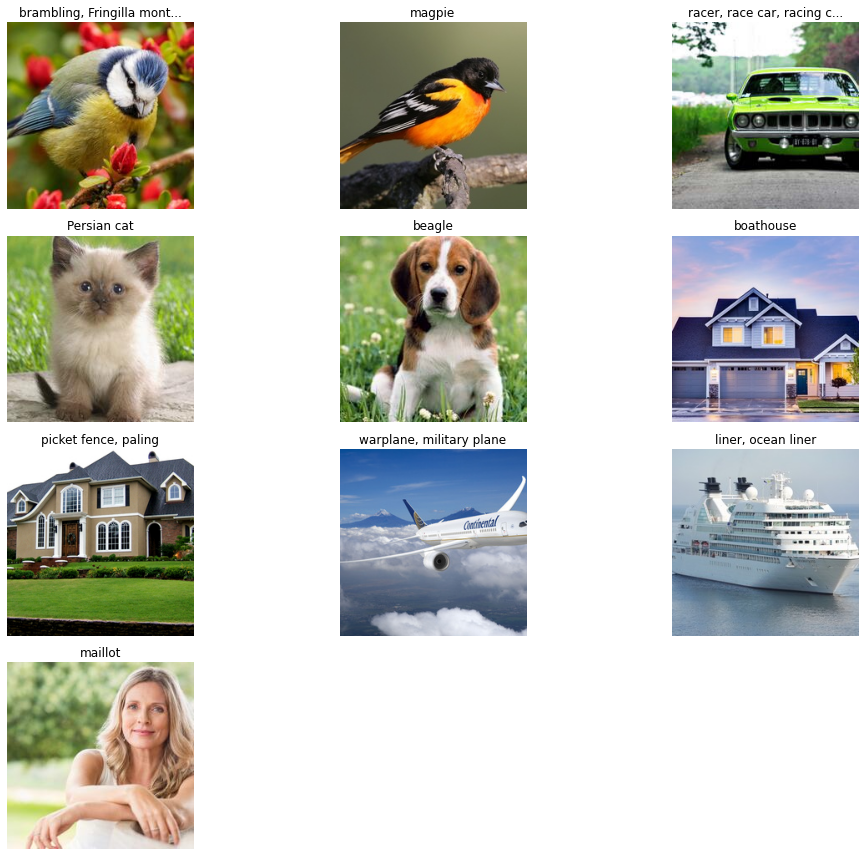

In [9]:
o = model.predict(x)
y = np.argmax(o,axis=1)
draw_images(x.astype(np.uint8),y, imagenet_labels )

In [10]:
# !mkdir -p ../data/imagenet
# !wget -P ../data/imagenet -c https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5

# WEIGHTS_VGG16='data/imagenet/vgg16_weights_tf_dim_ordering_tf_kernels.h5'
# model = VGG16(weights=WEIGHTS_VGG16)